In [1]:
import os
import re
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
from keras import layers
from keras import models
from keras import utils as np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import itertools

In [2]:
# Paths to datafiles
Ravdess = r"C:\Users\soura\OneDrive\Desktop\speechemo\Ravdess\audio_speech_actors_01-24"
Crema = r"C:\Users\soura\OneDrive\Desktop\speechemo\Crema"
Savee =  r"C:\Users\soura\OneDrive\Desktop\speechemo\savee"
Tess =  r"C:\Users\soura\OneDrive\Desktop\speechemo\Tess"

In [3]:
#DATA PREPARATION
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        emotion = int(info[2])
        emotion_df.append((emotion, os.path.join(Ravdess, dir, wav)))

print(ravdess_directory_list)
print (actor)


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']
['03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-24.wav', '03-01-01-01-02-01-24.wav', '03-01-01-01-02-02-24.wav', '03-01-02-01-01-01-24.wav', '03-01-02-01-01-02-24.wav', '03-01-02-01-02-01-24.wav', '03-01-02-01-02-02-24.wav', '03-01-02-02-01-01-24.wav', '03-01-02-02-01-02-24.wav', '03-01-02-02-02-01-24.wav', '03-01-02-02-02-02-24.wav', '03-01-03-01-01-01-24.wav', '03-01-03-01-01-02-24.wav', '03-01-03-01-02-01-24.wav', '03-01-03-01-02-02-24.wav', '03-01-03-02-01-01-24.wav', '03-01-03-02-01-02-24.wav', '03-01-03-02-02-01-24.wav', '03-01-03-02-02-02-24.wav', '03-01-04-01-01-01-24.wav', '03-01-04-01-01-02-24.wav', '03-01-04-01-02-01-24.wav', '03-01-04-01-02-02-24.wav', '03-01-04-02-01-01-24.wav', '03-01-04-

In [4]:
print(emotion_df)

[(1, 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-01-01-01.wav'), (1, 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-01-02-01.wav'), (1, 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-02-01-01.wav'), (1, 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-02-02-01.wav'), (2, 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-02-01-01-01-01.wav'), (2, 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-02-01-01-02-01.wav'), (2, 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-02-01-02-01-01.wav'), (2, 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-02-01

In [5]:
final_df = pd.DataFrame.from_dict(emotion_df)
#print(Ravdess_df)
final_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

In [6]:
final_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
final_df.head(200)

Emotion                                               Path
0    neutral  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...
1    neutral  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...
2    neutral  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...
3    neutral  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...
4       calm  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...
..       ...                                                ...
195    happy  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...
196    happy  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...
197    happy  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...
198    happy  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...
199    happy  C:\Users\soura\OneDrive\Desktop\speechemo\Ravd...

[200 rows x 2 columns]

In [7]:
final_df['Emotion'].value_counts()

Emotion
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: count, dtype: int64

In [8]:
Crema_directory_list = os.listdir(Crema)
#print(ravdess_directory_list)
emotion_dir_c = []
for dir in Crema_directory_list:
    wav = dir.partition(".wav")[0].split("_")
    emotion = wav[2]
    #print(emotion)
    emotion_dir_c.append((emotion,os.path.join(Crema,dir)))
  # print(emotion_dir)

In [9]:
emotion_dir_c

[('ANG',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_DFA_ANG_XX.wav'),
 ('DIS',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_DFA_DIS_XX.wav'),
 ('FEA',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_DFA_FEA_XX.wav'),
 ('HAP',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_DFA_HAP_XX.wav'),
 ('NEU',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_DFA_NEU_XX.wav'),
 ('SAD',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_DFA_SAD_XX.wav'),
 ('ANG',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_IEO_ANG_HI.wav'),
 ('ANG',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_IEO_ANG_LO.wav'),
 ('ANG',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_IEO_ANG_MD.wav'),
 ('DIS',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_IEO_DIS_HI.wav'),
 ('DIS',
  'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\Crema\\1001_IEO_DIS_LO.wav'),
 ('DIS',
 

In [10]:
Crema_df = pd.DataFrame.from_dict(emotion_dir_c)
Crema_df.rename(columns={0:'Emotion',1:'Path'},inplace=True)
Crema_df

Emotion                                               Path
0        ANG  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
1        DIS  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
2        FEA  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
3        HAP  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
4        NEU  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
...      ...                                                ...
7437     DIS  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
7438     FEA  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
7439     HAP  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
7440     NEU  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
7441     SAD  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...

[7442 rows x 2 columns]

In [11]:
Crema_df.Emotion.replace({'NEU':'neutral', 'HAP':'happy', 'SAD':'sad', 'ANG':'angry', 'FEA':'fear', 'DIS':'disgust'}, inplace=True)
Crema_df.head()

Emotion                                               Path
0    angry  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
1  disgust  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
2     fear  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
3    happy  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...
4  neutral  C:\Users\soura\OneDrive\Desktop\speechemo\Crem...

In [12]:
Crema_df['Emotion'].value_counts()

Emotion
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64

In [13]:
savee_directory_list = os.listdir(Savee)
#print(ravdess_directory_list)
emotion_dir_c = []
for dir in savee_directory_list:
    wav = dir.partition(".wav")[0].split("_")
    print(wav)
    emotion = wav[1][:2]
    print(emotion)
    emotion_dir_c.append((emotion,os.path.join(Savee,dir)))
  # print(emotion_dir)

['DC', 'a01']
a0
['DC', 'a02']
a0
['DC', 'a03']
a0
['DC', 'a04']
a0
['DC', 'a05']
a0
['DC', 'a06']
a0
['DC', 'a07']
a0
['DC', 'a08']
a0
['DC', 'a09']
a0
['DC', 'a10']
a1
['DC', 'a11']
a1
['DC', 'a12']
a1
['DC', 'a13']
a1
['DC', 'a14']
a1
['DC', 'a15']
a1
['DC', 'd01']
d0
['DC', 'd02']
d0
['DC', 'd03']
d0
['DC', 'd04']
d0
['DC', 'd05']
d0
['DC', 'd06']
d0
['DC', 'd07']
d0
['DC', 'd08']
d0
['DC', 'd09']
d0
['DC', 'd10']
d1
['DC', 'd11']
d1
['DC', 'd12']
d1
['DC', 'd13']
d1
['DC', 'd14']
d1
['DC', 'd15']
d1
['DC', 'f01']
f0
['DC', 'f02']
f0
['DC', 'f03']
f0
['DC', 'f04']
f0
['DC', 'f05']
f0
['DC', 'f06']
f0
['DC', 'f07']
f0
['DC', 'f08']
f0
['DC', 'f09']
f0
['DC', 'f10']
f1
['DC', 'f11']
f1
['DC', 'f12']
f1
['DC', 'f13']
f1
['DC', 'f14']
f1
['DC', 'f15']
f1
['DC', 'h01']
h0
['DC', 'h02']
h0
['DC', 'h03']
h0
['DC', 'h04']
h0
['DC', 'h05']
h0
['DC', 'h06']
h0
['DC', 'h07']
h0
['DC', 'h08']
h0
['DC', 'h09']
h0
['DC', 'h10']
h1
['DC', 'h11']
h1
['DC', 'h12']
h1
['DC', 'h13']
h1
['DC', 'h14']


In [14]:
emotion_dir_c

[('a0', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a01.wav'),
 ('a0', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a02.wav'),
 ('a0', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a03.wav'),
 ('a0', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a04.wav'),
 ('a0', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a05.wav'),
 ('a0', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a06.wav'),
 ('a0', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a07.wav'),
 ('a0', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a08.wav'),
 ('a0', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a09.wav'),
 ('a1', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a10.wav'),
 ('a1', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a11.wav'),
 ('a1', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\DC_a12.wav'),
 ('a1', 'C:\\Users\\soura\\OneDrive\\Desktop\\speechemo\\savee\\

In [15]:
Savee_df = pd.DataFrame.from_dict(emotion_dir_c)
Savee_df.rename(columns={0:'Emotion',1:'Path'},inplace=True)
Savee_df.head()

Emotion                                               Path
0      a0  C:\Users\soura\OneDrive\Desktop\speechemo\save...
1      a0  C:\Users\soura\OneDrive\Desktop\speechemo\save...
2      a0  C:\Users\soura\OneDrive\Desktop\speechemo\save...
3      a0  C:\Users\soura\OneDrive\Desktop\speechemo\save...
4      a0  C:\Users\soura\OneDrive\Desktop\speechemo\save...

In [16]:
import pandas as pd

# Assuming df is your dataframe and 'emotion' is the column containing the codes (e.g., 'a0', 'a1', ...)
mapping = {'a': 'angry', 'd': 'disgust', 'f': 'fear', 'h': 'happy', 'n': 'neutral','sa':'sad','su':'surprise'}

# Assuming the column containing the codes is named 'emotion'
Savee_df['Emotion'] = Savee_df['Emotion'].replace({k: v for k, v in mapping.items()}, regex=True)

In [17]:
Savee_df['Emotion'].value_counts()

Emotion
sadngry     60
surprise    60
neutral1    40
neutral2    40
angry0      36
disgust0    36
fear0       36
happy0      36
neutral0    36
angry1      24
disgust1    24
fear1       24
happy1      24
neutral3     4
Name: count, dtype: int64

In [18]:
Savee_df['Emotion'] = Savee_df['Emotion'].replace(r'\d$', '', regex=True)
Savee_df.head()

Emotion                                               Path
0   angry  C:\Users\soura\OneDrive\Desktop\speechemo\save...
1   angry  C:\Users\soura\OneDrive\Desktop\speechemo\save...
2   angry  C:\Users\soura\OneDrive\Desktop\speechemo\save...
3   angry  C:\Users\soura\OneDrive\Desktop\speechemo\save...
4   angry  C:\Users\soura\OneDrive\Desktop\speechemo\save...

In [19]:
Savee_df['Emotion'].value_counts()

Emotion
neutral     120
angry        60
disgust      60
fear         60
happy        60
sadngry      60
surprise     60
Name: count, dtype: int64

In [20]:
#final_df = pd.concat([Savee_df,Ravdess_df,Crema_df],ignore_index=True)
#final_df

In [21]:
final_df.shape

(1440, 2)

In [22]:
final_df['Emotion'].replace({'sadngry':'sad'},inplace=True)
final_df['Emotion'].value_counts()

Emotion
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: count, dtype: int64

In [23]:
#LETS VISULISE DATA
%matplotlib inline

plt.style.use("ggplot")

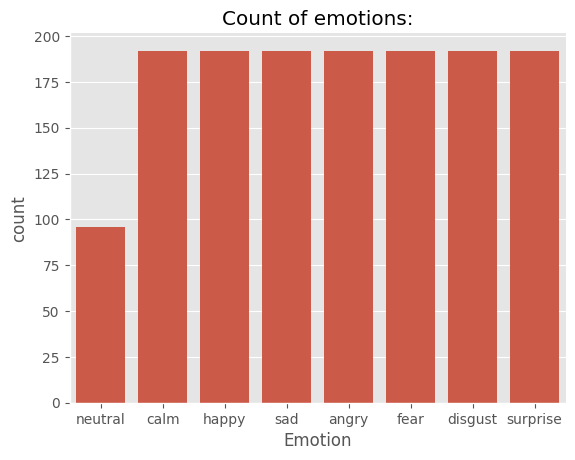

In [24]:
plt.title("Count of emotions:")
sns.countplot(x=final_df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [25]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

C:\Users\soura\OneDrive\Desktop\speechemo\Ravdess\audio_speech_actors_01-24\Actor_11\03-01-07-01-01-01-11.wav
22050


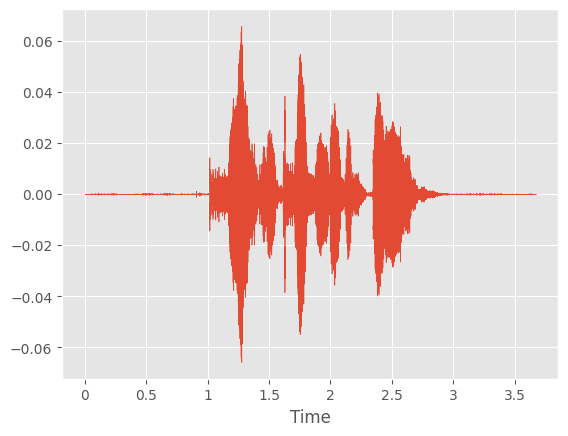

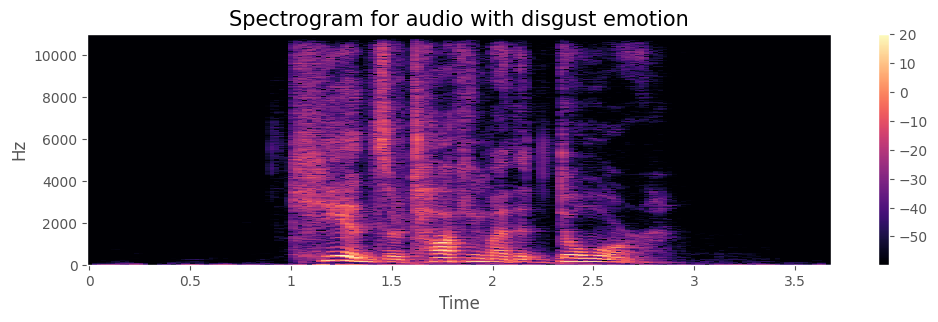

In [26]:
emotion='disgust'
path = np.array(final_df.Path[final_df.Emotion==emotion])[80]
print(path)
data, sampling_rate = librosa.load(path)
print(sampling_rate)
librosa.display.waveshow(data, sr=sampling_rate)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

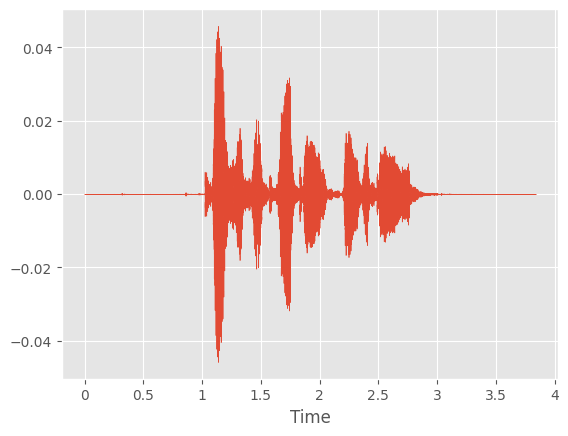

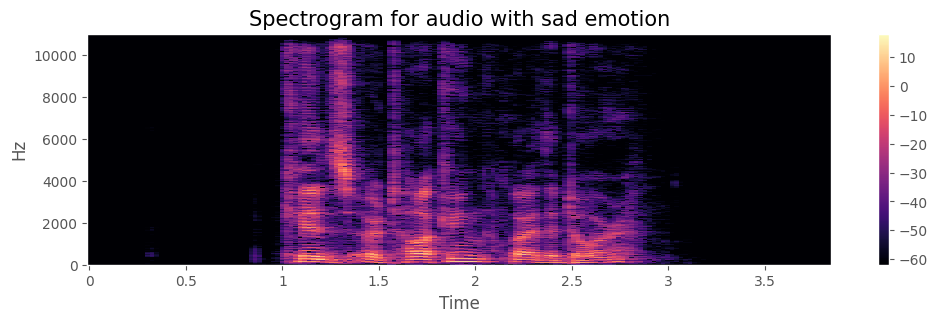

In [27]:
emotion='sad'
path = np.array(final_df.Path[final_df.Emotion==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

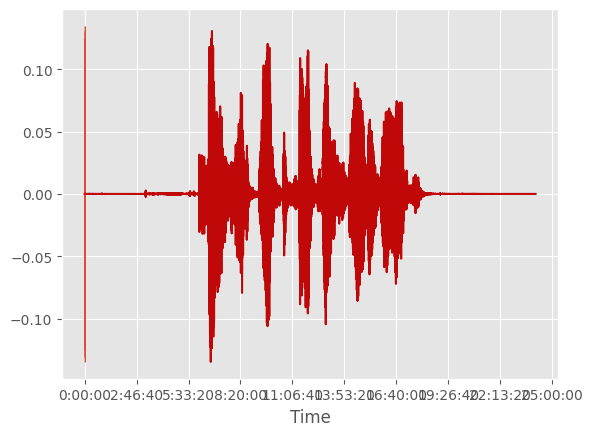

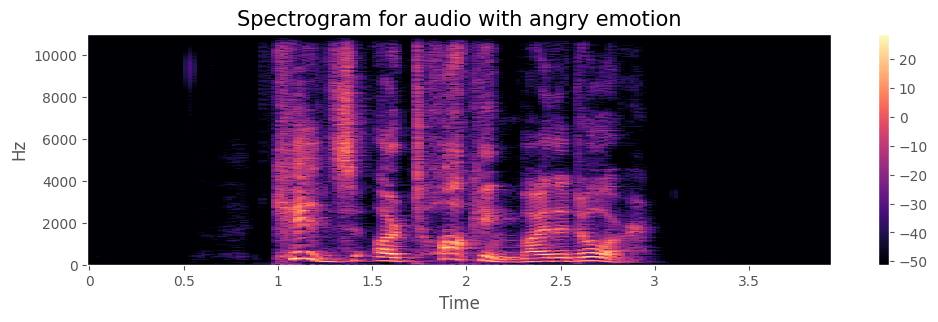

In [28]:
emotion='angry'
path = np.array(final_df.Path[final_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
plt.plot(data, color='#C00808')
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

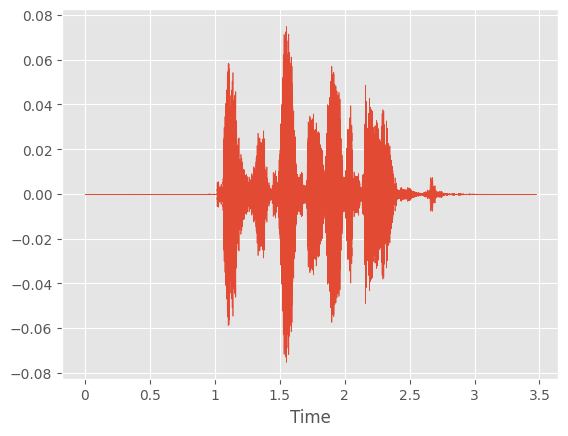

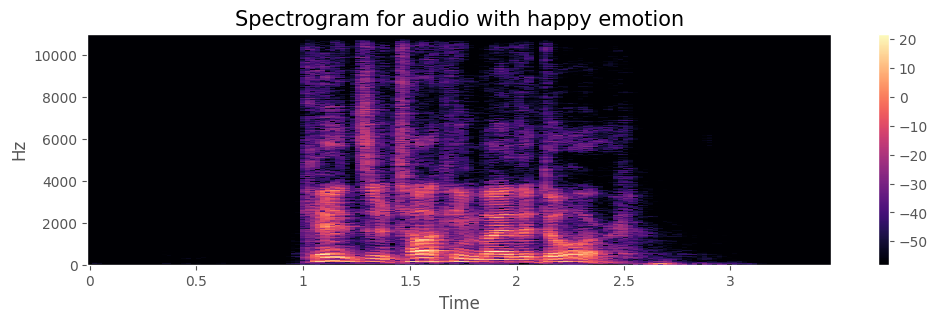

In [29]:
emotion='happy'
path = np.array(final_df.Path[final_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

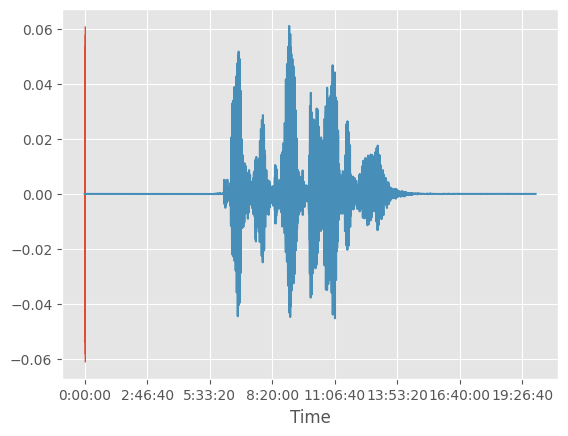

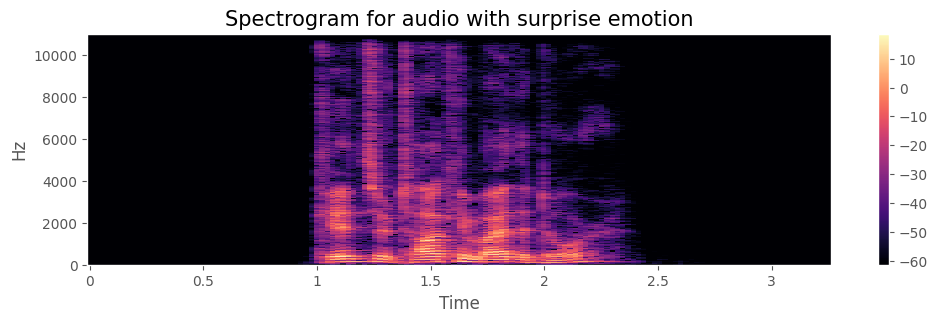

In [30]:
emotion='surprise'
path = np.array(final_df.Path[final_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
plt.plot(data, color='#478FB8')
librosa.display.waveshow(data, sr=sampling_rate)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

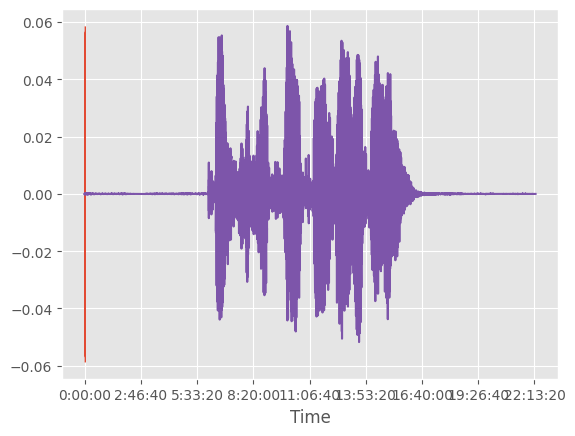

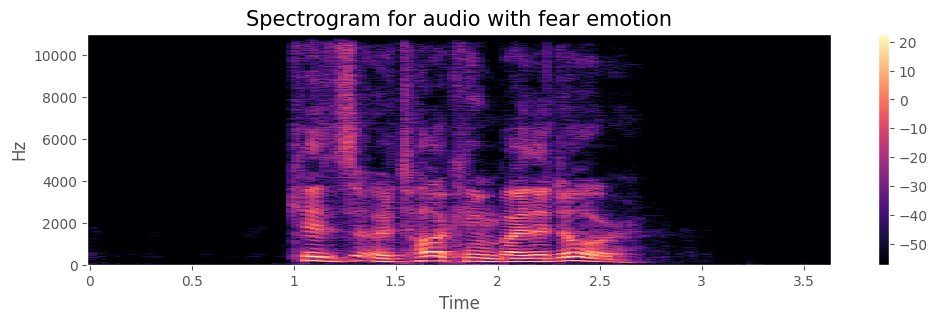

In [31]:
emotion='fear'
path = np.array(final_df.Path[final_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
plt.plot(data, color='#7D55AA')
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

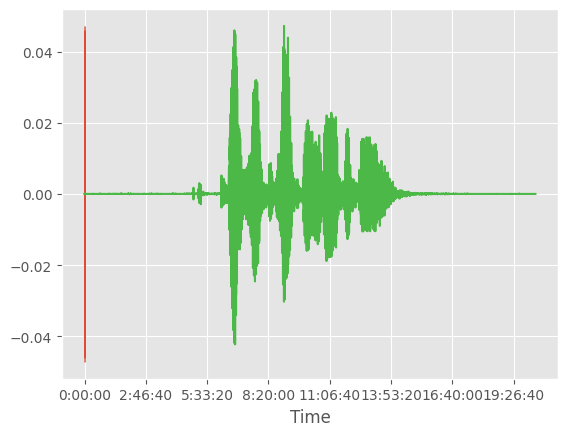

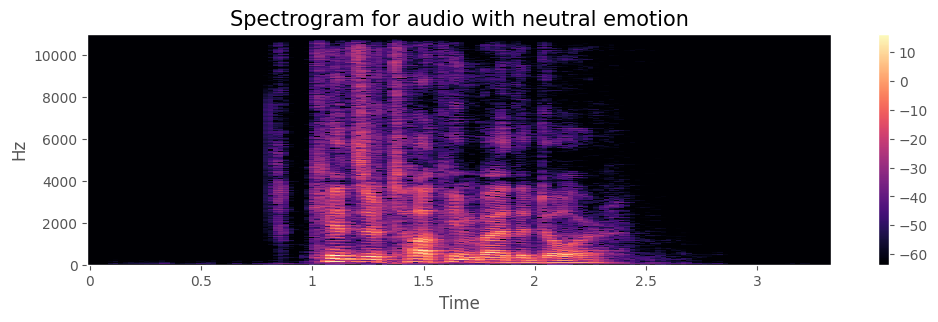

In [32]:
emotion='neutral'
path = np.array(final_df.Path[final_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
plt.plot(data, color='#4CB847')
librosa.display.waveshow(data, sr=sampling_rate)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [33]:
emotion='happy'
path = np.array(final_df.Path[final_df.Emotion==emotion])[10]
data,sampling_rate = librosa.load(path)


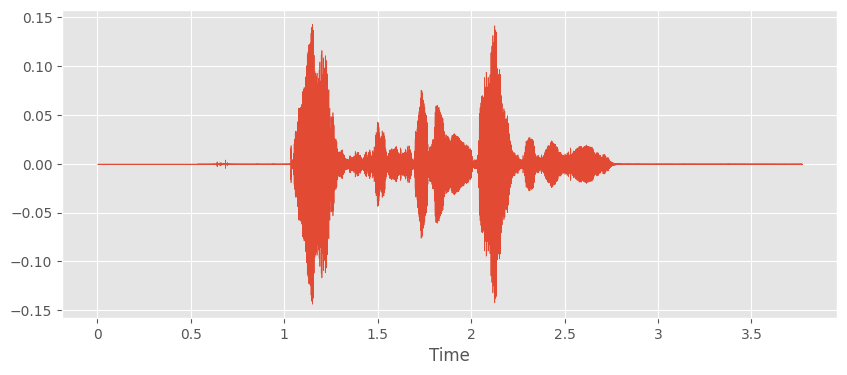

In [34]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(data,sr=sampling_rate)
Audio(path)

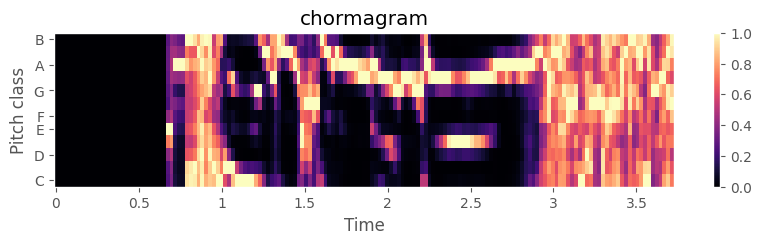

In [35]:
emotion='sad'
path = np.array(final_df.Path[final_df.Emotion==emotion])[10]
data,sampling_rate = librosa.load(path)
plt.figure(figsize=(10,2))
#compte chormagram using stft
chroma = librosa.feature.chroma_stft(y=data, sr=sampling_rate)
#plot chromagram
librosa.display.specshow(chroma,y_axis='chroma',x_axis='time')
plt.colorbar()
plt.title('chormagram')
Audio(path)
plt.show()

In [36]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [37]:
"""
Feature extraction:
There are some features may be useful:
Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
Energy : The sum of squares of the signal values, normalized by the respective frame length.
Entropy of Energy :The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
Spectral Centroid : The center of gravity of the spectrum.
Spectral Spread : The second central moment of the spectrum.
Spectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.
Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
"""

'\nFeature extraction:\nThere are some features may be useful:\nZero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.\nEnergy : The sum of squares of the signal values, normalized by the respective frame length.\nEntropy of Energy :The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.\nSpectral Centroid : The center of gravity of the spectrum.\nSpectral Spread : The second central moment of the spectrum.\nSpectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.\nSpectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.\nSpectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.\nMFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.\n'

In [38]:
emotion='sad'
path = np.array(final_df.Path[final_df.Emotion==emotion])[10]
data,sr = librosa.load(path)

def extract_features(data):
    # Zero Crossing Rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, chroma_stft))     

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mfcc))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr, n_fft=512, n_mels=64).T, axis=0)
    result = np.hstack((result, mel))
    
    # Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, tonnetz))
    
    return result

In [39]:
def get_features(data):
    result = []
    
    # without augmentation
    res1 = extract_features(data)
    result.append(res1)
    
    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result.append(res2)
    
    # with stretching and pitching
    data_stretch = stretch(data)
    res3 = extract_features(data_stretch)
    result.append(res3)
    
    return result


In [40]:
def stretch(data, rate=0.8):
       return librosa.effects.time_stretch(data, rate=0.8)


In [41]:
X, Y = [], []
print("Feature processing...")
for path, emotion, ind in zip(final_df.Path, final_df.Emotion, range(final_df.Path.shape[0])):
    features = get_features(data)
    if ind % 100 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print("Done. ")

Feature processing...


c:\Users\soura\Envs\ser\lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


0 samples has been processed...
100 samples has been processed...
200 samples has been processed...
300 samples has been processed...
400 samples has been processed...
500 samples has been processed...
600 samples has been processed...
700 samples has been processed...
800 samples has been processed...
900 samples has been processed...
1000 samples has been processed...
1100 samples has been processed...
1200 samples has been processed...
1300 samples has been processed...
1400 samples has been processed...
Done. 


In [43]:
features_path = "./features.csv"

In [45]:
extracted_df = pd.DataFrame(X)
extracted_df["labels"] = Y
extracted_df.to_csv(features_path, index=False)
extracted_df.head()

0         1         2         3         4         5         6  \
0  0.256332  0.498421  0.442882  0.416261  0.486423  0.446913  0.394679   
1  0.367318  0.751029  0.719428  0.717008  0.788088  0.757685  0.680313   
2  0.160371  0.487741  0.432384  0.429335  0.495379  0.438949  0.396127   
3  0.256332  0.498421  0.442882  0.416261  0.486423  0.446913  0.394679   
4  0.325038  0.684497  0.644340  0.643818  0.709973  0.678460  0.626659   
5  0.160371  0.487741  0.432384  0.429335  0.495379  0.438949  0.396127   
6  0.256332  0.498421  0.442882  0.416261  0.486423  0.446913  0.394679   
7  0.341397  0.711366  0.677123  0.671406  0.738914  0.712592  0.650842   
8  0.160371  0.487741  0.432384  0.429335  0.495379  0.438949  0.396127   
9  0.256332  0.498421  0.442882  0.416261  0.486423  0.446913  0.394679   

          7         8         9  ...        94        95            96  \
0  0.417552  0.519379  0.645795  ...  0.000003  0.000003  1.641723e-06   
1  0.623352  0.719032  0.806007  ...  0.000017  0.000018  1.587465e-05   
2  0.422090  0.544420  0.665689  ...  0.000002  0.000001  5.489817e-07   
3  0.417552  0.519379  0.645795  ...  0.000003  0.000003  1.641723e-06   
4  0.571444  0.674690  0.787188  ...  0.000004  0.000004  2.343736e-06   
5  0.422090  0.544420  0.665689  ...  0.000002  0.000001  5.489817e-07   
6  0.417552  0.519379  0.645795  ...  0.000003  0.000003  1.641723e-06   
7  0.584547  0.675549  0.799945  ...  0.000007  0.000006  4.684582e-06   
8  0.422090  0.544420  0.665689  ...  0.000002  0.000001  5.489817e-07   
9  0.417552  0.519379  0.645795  ...  0.000003  0.000003  1.641723e-06   

         97        98        99       100       101       102   labels  
0 -0.054822  0.025897  0.021395  0.094769 -0.018494 -0.003132  neutral  
1 -0.023796  0.023075  0.035753  0.051834 -0.009017 -0.008494  neutral  
2 -0.075478  0.013140 -0.000852  0.105525 -0.021730  0.001252  neutral  
3 -0.054822  0.025897  0.021395  0.094769 -0.018494 -0.003132  neutral  
4 -0.038063  0.027381  0.034257  0.075613 -0.012691 -0.008805  neutral  
5 -0.075478  0.013140 -0.000852  0.105525 -0.021730  0.001252  neutral  
6 -0.054822  0.025897  0.021395  0.094769 -0.018494 -0.003132  neutral  
7 -0.024885  0.019074  0.039547  0.069907 -0.010652 -0.010288  neutral  
8 -0.075478  0.013140 -0.000852  0.105525 -0.021730  0.001252  neutral  
9 -0.054822  0.025897  0.021395  0.094769 -0.018494 -0.003132  neutral  

[10 rows x 104 columns]

In [46]:
extracted_df = pd.read_csv(features_path)
print(extracted_df.shape)

(4320, 104)


In [47]:
# Fill NaN with 0
extracted_df = extracted_df.fillna(0)
print(extracted_df.isna().any())
extracted_df.shape

0         False
1         False
2         False
3         False
4         False
          ...  
99        False
100       False
101       False
102       False
labels    False
Length: 104, dtype: bool


(4320, 104)

In [48]:
extracted_df.head()

0         1         2         3         4         5         6  \
0  0.256332  0.498421  0.442882  0.416261  0.486423  0.446913  0.394679   
1  0.367318  0.751029  0.719428  0.717008  0.788088  0.757685  0.680313   
2  0.160371  0.487741  0.432384  0.429335  0.495379  0.438949  0.396127   
3  0.256332  0.498421  0.442882  0.416261  0.486423  0.446913  0.394679   
4  0.325038  0.684497  0.644340  0.643818  0.709973  0.678460  0.626659   

          7         8         9  ...        94        95            96  \
0  0.417552  0.519379  0.645795  ...  0.000003  0.000003  1.641723e-06   
1  0.623352  0.719032  0.806007  ...  0.000017  0.000018  1.587465e-05   
2  0.422090  0.544420  0.665689  ...  0.000002  0.000001  5.489817e-07   
3  0.417552  0.519379  0.645795  ...  0.000003  0.000003  1.641723e-06   
4  0.571444  0.674690  0.787188  ...  0.000004  0.000004  2.343736e-06   

         97        98        99       100       101       102   labels  
0 -0.054822  0.025897  0.021395  0.094769 -0.018494 -0.003132  neutral  
1 -0.023796  0.023075  0.035753  0.051834 -0.009017 -0.008494  neutral  
2 -0.075478  0.013140 -0.000852  0.105525 -0.021730  0.001252  neutral  
3 -0.054822  0.025897  0.021395  0.094769 -0.018494 -0.003132  neutral  
4 -0.038063  0.027381  0.034257  0.075613 -0.012691 -0.008805  neutral  

[5 rows x 104 columns]

In [49]:
X = extracted_df.drop(labels="labels", axis=1)
Y = extracted_df["labels"]

In [50]:
lb = LabelEncoder()
Y = np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3456, 103), (864, 103), (3456, 8), (864, 8))

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((3110, 103), (864, 103), (346, 103), (3110, 8), (864, 8), (346, 8))

In [53]:
# Standardize data
scaler = StandardScaler()
gen = scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((3110, 103), (864, 103), (346, 103), (3110, 8), (864, 8), (346, 8))

In [55]:
import joblib
joblib.dump(gen,'std.pkl')

['std.pkl']

In [56]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.57862019,  1.78690051,  1.71066755, ..., -2.09790287,
         1.97452941, -0.83023895],
       [ 0.01989444, -0.63804902, -0.64428416, ...,  0.29021693,
        -0.26326825, -0.21845017],
       [ 1.08909663,  1.37815514,  1.28703525, ..., -1.19074064,
         1.15252253, -2.05951367],
       ...,
       [-1.20125397, -0.73949716, -0.73378748, ...,  0.91174791,
        -0.93282579,  0.90995249],
       [ 0.01989444, -0.63804902, -0.64428416, ...,  0.29021693,
        -0.26326825, -0.21845017],
       [ 1.33073231,  1.60522742,  1.5279929 , ..., -2.27046529,
         2.53661473, -1.92289622]])

In [57]:
joblib.load('std.pkl').transform(X_train)

c:\Users\soura\Envs\ser\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[  16.846602  ,   11.60122495,   10.16402782, ..., -126.41234579,
         412.1781743 , -213.09755703],
       [  -2.98888652,  -11.43338158,   -9.91275507, ...,   11.58406479,
         -50.91737949,  -55.63653519],
       [  10.61719385,    7.71855088,    6.55241506, ...,  -73.99239107,
         242.06997458, -529.48592223],
       ...,
       [ -18.52855099,  -12.39703794,  -10.67580197, ...,   47.49894813,
        -189.47732372,  234.78957341],
       [  -2.98888652,  -11.43338158,   -9.91275507, ...,   11.58406479,
         -50.91737949,  -55.63653519],
       [  13.69211694,    9.87551143,    8.60666281, ..., -136.38378621,
         528.49754383, -494.32358547]])

In [58]:
# We have to use 1-dimensional CNN which need specifical shape:
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(3110, 103, 1)

In [78]:
"""
earlystopping = EarlyStopping(monitor ="val_acc",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)
                              """

'\nearlystopping = EarlyStopping(monitor ="val_acc",\n                              mode = \'auto\', patience = 5,\n                              restore_best_weights = True)\n                              '

In [79]:
"""
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
                                    """

"\nlearning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',\n                                            patience=3,\n                                            verbose=1,\n                                            factor=0.5,\n                                            min_lr=0.00001)\n                                    "

In [80]:
model = models.Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(8, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])

In [81]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 103, 512)          3072      
                                                                 
 batch_normalization_24 (Ba  (None, 103, 512)          2048      
 tchNormalization)                                               
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 52, 512)           0         
 ng1D)                                                           
                                                                 
 conv1d_21 (Conv1D)          (None, 52, 512)           1311232   
                                                                 
 batch_normalization_25 (Ba  (None, 52, 512)           2048      
 tchNormalization)                                               
                                                      

In [82]:
EPOCHS = 50
batch_size = 64

In [83]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=EPOCHS, batch_size=batch_size
                    )

Epoch 1/50
49/49 [==============================] - 21s 401ms/step - loss: 2.4916 - acc: 0.1283 - val_loss: 2.1691 - val_acc: 0.1792
Epoch 2/50
49/49 [==============================] - 21s 425ms/step - loss: 2.1896 - acc: 0.1338 - val_loss: 2.2708 - val_acc: 0.1358
Epoch 3/50
49/49 [==============================] - 21s 419ms/step - loss: 2.1655 - acc: 0.1277 - val_loss: 2.3023 - val_acc: 0.1561
Epoch 4/50
49/49 [==============================] - 21s 435ms/step - loss: 2.1343 - acc: 0.1315 - val_loss: 2.3852 - val_acc: 0.0867
Epoch 5/50
49/49 [==============================] - 21s 420ms/step - loss: 2.1291 - acc: 0.1244 - val_loss: 2.3009 - val_acc: 0.0867
Epoch 6/50
49/49 [==============================] - 21s 426ms/step - loss: 2.1361 - acc: 0.1312 - val_loss: 2.4136 - val_acc: 0.1127
Epoch 7/50
49/49 [==============================] - 21s 421ms/step - loss: 2.1217 - acc: 0.1350 - val_loss: 2.1770 - val_acc: 0.1098
Epoch 8/50
49/49 [==============================] - 20s 419ms/step - 